<a href="https://colab.research.google.com/github/tekky02/learn_cv/blob/master/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import torch
from torch import nn,optim
import torchvision
import sys
from matplotlib import pyplot as plt
from IPython import display
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

 # 你需要在这里复现AlexNet
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # 注意：使用的fashion-MNIST数据集的类别数为10，也就是说最后的全连接层的输出维度为10
        #
        self.features = nn.Sequential(  #打包
            nn.Conv2d(1, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True), #inplace 可以载入更大模型
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            #全链接
            nn.Linear(6400, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10),
        )
        
        #

    def forward(self, x):
        # 此处需要你根据你写的网络补充forward()函数
        # 输入的图像为x，网络输出的结果为output
        #
        x = self.features(x)
        x = torch.flatten(x, start_dim=1) #展平   或者view()
        output = self.classifier(x)

        #
        return output


net = AlexNet()
print(net) # 查看网络结构

AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=6400, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
 

In [ ]:
def load_data_fashion_mnist(batch_size, resize = None, root = '~/FashionMNIST'):
    """加载FashionMNIST数据集."""
    trans = []
    if resize:
        trans.append(torchvision.transforms.Resize(size = resize))
    trans.append(torchvision.transforms.ToTensor())
    
    transform = torchvision.transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = root, train = True, 
        download =True, transform = transform)
    mnist_test = torchvision.datasets.FashionMNIST(root = root, train = False, 
        download =True, transform = transform)
    
    train_iter = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size,
        shuffle = True, num_workers = 4)
    test_iter = torch.utils.data.DataLoader(mnist_test, batch_size = batch_size,
        shuffle = False, num_workers = 4)
    
    return train_iter, test_iter

In [ ]:
# 你需要在这里补全你的train函数
def train(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs):
    net = net.to(device)
    print("training on ", device)
    #

#     net.train()
    loss_function = nn.CrossEntropyLoss()

    #
    for epoch in range(num_epochs):
        net.train()
        train_loss_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        batch_count = 0
        for X, y in train_iter:
            X = X.to(device)
            y = y.to(device)
            
            #
            optimizer.zero_grad()
            output = net(X)
            predict_y = torch.max(output, dim=1)[1]
            loss = loss_function(output, y)
            loss.backward()
            optimizer.step()
            train_loss_sum += loss.item()
            train_acc_sum += (predict_y == y).sum().item()
            n += y.shape[0]
            #
            
            batch_count += 1
        test_acc =evaluate(net, test_iter, device)
        
        # 以下为每一个epoch的输出示例，请大家自行修改
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, time %.1f sec'
             % (epoch + 1, train_loss_sum / batch_count, train_acc_sum / n, 
                test_acc, time.time() - start))

In [ ]:
# 在这里补全evaluate函数
def evaluate(net, data_iter, device):
    acc_sum, n = 0.0, 0
    with torch.no_grad():
        for X, y in data_iter:
            net.eval()
            
            #
            output = net(X.to(device))
            predict_y = torch.max(output, dim=1)[1]
            acc_sum += (predict_y == y.to(device)).sum().item()
            
            #
            
            net.train()
            n += y.shape[0]
    return acc_sum / n           

In [ ]:
# 参数设置，数据集的加载与模型的训练
# 大家可以自行修改这些参数
batch_size = 128
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224) # 图像转化为 224x224大小
lr = 0.001
num_epochs = 10
optimizer = torch.optim.Adam(net.parameters(), lr = lr)
train(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)


Extracting /root/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/FashionMNIST/FashionMNIST/raw




Extracting /root/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/FashionMNIST/FashionMNIST/raw




Extracting /root/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/FashionMNIST/FashionMNIST/raw




Extracting /root/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/FashionMNIST/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

training on  cuda


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch 1, loss 0.6293, train acc 0.759, test acc 0.863, time 108.8 sec
epoch 2, loss 0.3522, train acc 0.869, test acc 0.887, time 108.9 sec
epoch 3, loss 0.3023, train acc 0.887, test acc 0.886, time 109.2 sec
epoch 4, loss 0.2740, train acc 0.897, test acc 0.899, time 109.0 sec
epoch 5, loss 0.2609, train acc 0.903, test acc 0.907, time 109.3 sec
epoch 6, loss 0.2394, train acc 0.911, test acc 0.910, time 108.8 sec
epoch 7, loss 0.2255, train acc 0.915, test acc 0.910, time 108.8 sec
epoch 8, loss 0.2139, train acc 0.920, test acc 0.909, time 109.1 sec
epoch 9, loss 0.2038, train acc 0.925, test acc 0.918, time 109.4 sec
epoch 10, loss 0.1994, train acc 0.927, test acc 0.914, time 109.3 sec


In [ ]:
def get_fashion_mnist_labels(labels): # 取得label
    test_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle', 'boot']
    return [test_labels[int(i)] for i in labels]

In [ ]:
def show_fashion_mnist(images, labels): # 图像输出
    display.set_matplotlib_formats('svg') # 用矢量图表示
    _, figs = plt.subplots(1, len(images), figsize = (12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((224, 224)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


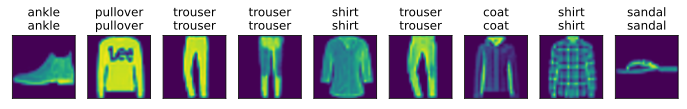

In [ ]:
 # 测试你的
X, y = iter(test_iter).next()
net = net.to('cpu')

true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(net(X).argmax(dim = 1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

show_fashion_mnist(X[0:9], titles[0:9]) # 输出十个测试样本及测试结果